## Data Visualization with Seaborn


In this notebook we will try out another library for data visualization called [Seaborn](https://seaborn.pydata.org/index.html)

Let's import all the libraries first. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

Read in the table with returned orders



In [2]:
orders = pd.read_csv('datasets/returned_orders.csv')
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,product_name,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category,returned,discount_level
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,"Sauder Library with Doors, Traditional",360.51,3 days,2022,7,3,Thursday,Low,No,High
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,"Dania Corner Shelving, Metal",70.50,-174 days,2020,7,4,Friday,High,No,Low
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,"Dania Classic Bookcase, Pine",239.04,153 days,2020,7,3,Thursday,High,No,NaN
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,"Dania Classic Bookcase, Pine",239.04,67 days,2019,7,1,Tuesday,High,No,Low
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,"Dania Classic Bookcase, Pine",239.04,122 days,2019,8,0,Monday,High,No,Low


### Histogram with Seaborn

Seaborn is built on top of Matplotlib, and is integrated with Pandas. 

There are many high level functions defined in Seaborn that can help us to create complex plots quickly. 

The basic histogram is created by specifying the data and the column to be used for the x-axis.

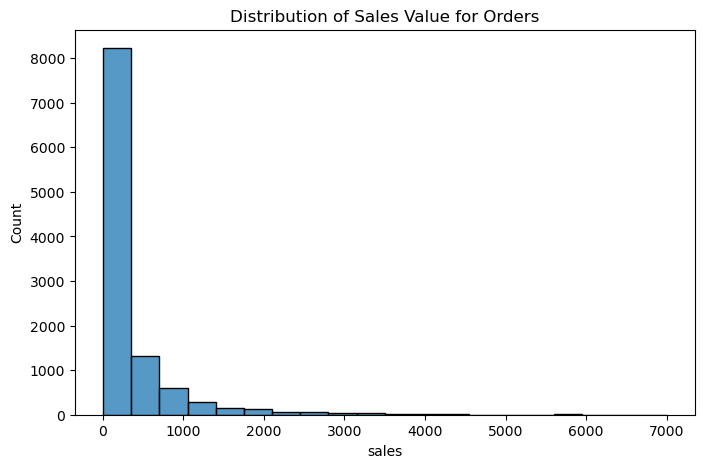

In [3]:
# Create histogram with seaborn, return the axes object
fig = plt.figure(figsize=(8,5))
ax= sns.histplot(data = orders, x = 'sales', bins=20)

# use the axes object to customize
ax.set_title('Distribution of Sales Value for Orders')
plt.show()

## Comparing Categories

Seaborn makes it easy to add categorical comparisons by color. 

We can compare the distribution for different product categories by adding the keyword argument `hue`.
Specifying the `category` as the `hue` will separate each category by color.


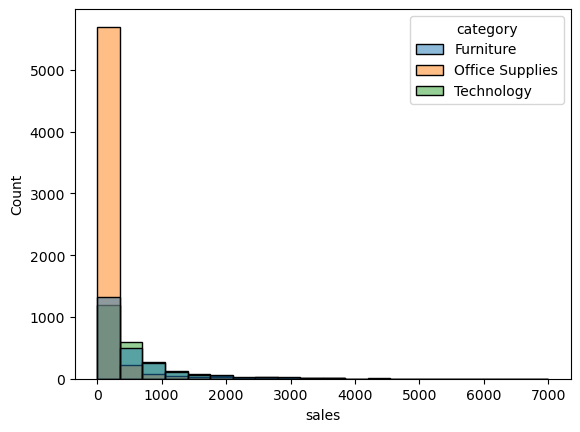

In [4]:
# Create histogram with seaborn
ax = sns.histplot(data = orders, x = 'sales', bins = 20, hue='category')
plt.show()

## Seaborn boxplot

Similarly, we can create a comparative boxplot that might make it easier for us to view the distribution by sub category



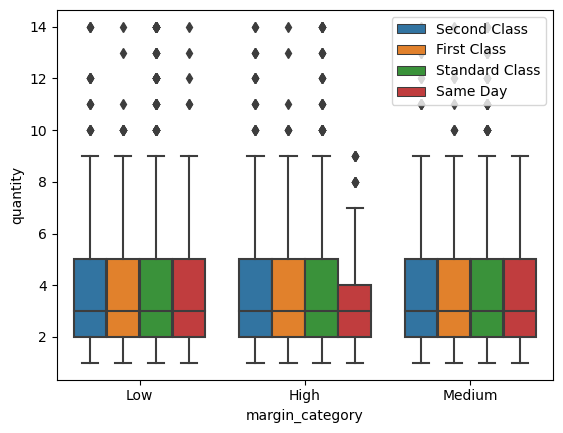

In [5]:
# Create boxplot by Cateogry and Sales
ax = sns.boxplot(data =orders, 
                 x='margin_category', 
                 y='quantity',
                hue='ship_mode')
ax.legend(loc='upper right')
plt.show()

In [6]:
orders.dtypes

order_id            object
order_date          object
ship_date           object
ship_mode           object
customer_id         object
product_id          object
sales              float64
quantity             int64
discount           float64
profit             float64
profit_margin      float64
category            object
sub_category        object
product_name        object
unit_cost          float64
days_to_ship        object
order_year           int64
order_month_no       int64
order_day            int64
order_day_name      object
margin_category     object
returned            object
discount_level      object
dtype: object

### Scatterplot with Seaborn

Recall that we previously created a scatterplot using the `scatter` method in Matplotlib.

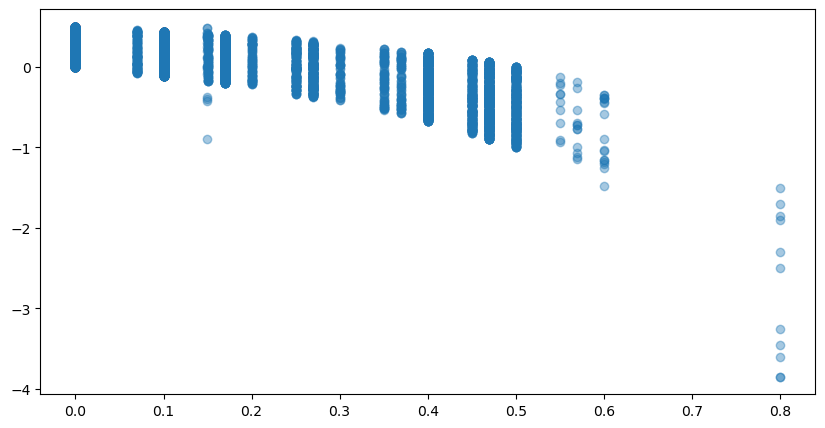

In [7]:
# Scatterplot with matplotlib
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(data = orders, x='discount', y='profit_margin',alpha=0.4)
plt.show()

Let's say we wanted to create the same scatter plot but we want to compare the `ship_mode` category.

All we have to do is to add the `ship_mode` for the `hue` argument, and this will *color* the points according to whether it was returned, and automatically create the legend.

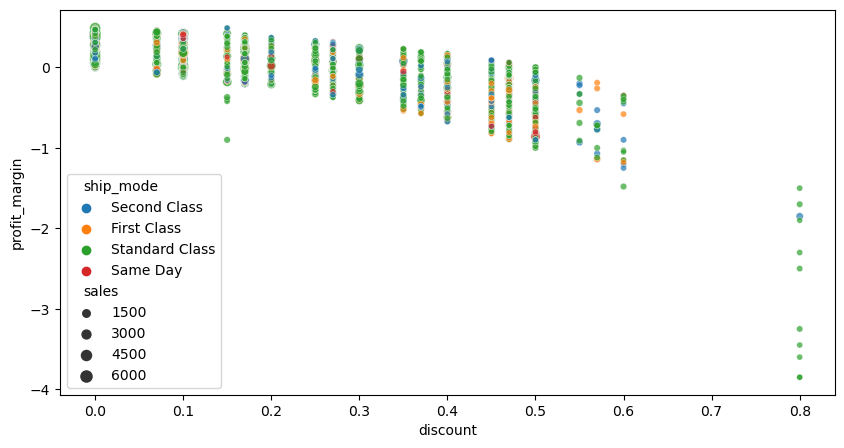

In [8]:
# Create the scatterplot using seaborn, still using figure and ax as before 

fig, ax = plt.subplots(figsize=(10,5))

## but now we can add hue for a categorical variable and size for a numeric variable
ax = sns.scatterplot(data =orders, 
                     x='discount', y='profit_margin', 
                     hue='ship_mode', size='sales', alpha = 0.7)
plt.show()

## Jointplot

#The seaborn jointplot shows the scatterplot relationship (bivariate) and the distribution of the individual variables (univariate)

Check the different kinds of plots for both the bivariate and univariate plots by setting the `kind=` parameter
https://seaborn.pydata.org/generated/seaborn.jointplot.html

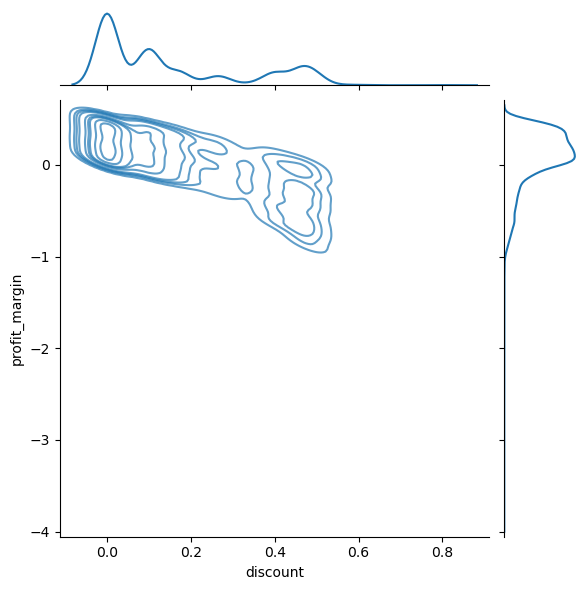

In [9]:
# Create the jointplot using seaborn, still using figure and ax as before 
sns.jointplot(data =orders, x='discount', y='profit_margin', alpha = 0.7, 
              kind = 'kde')

# add the hue by ship mode and see what happens!
# try kind='kde', kind='reg', kind='hex'

## Pairplot

The Seaborn pairplot will plot all the parameters, for our dataset let's limit to a few to compare:


In [10]:
plot_data = orders[['discount', 'profit_margin', 'quantity','sales','order_day']]

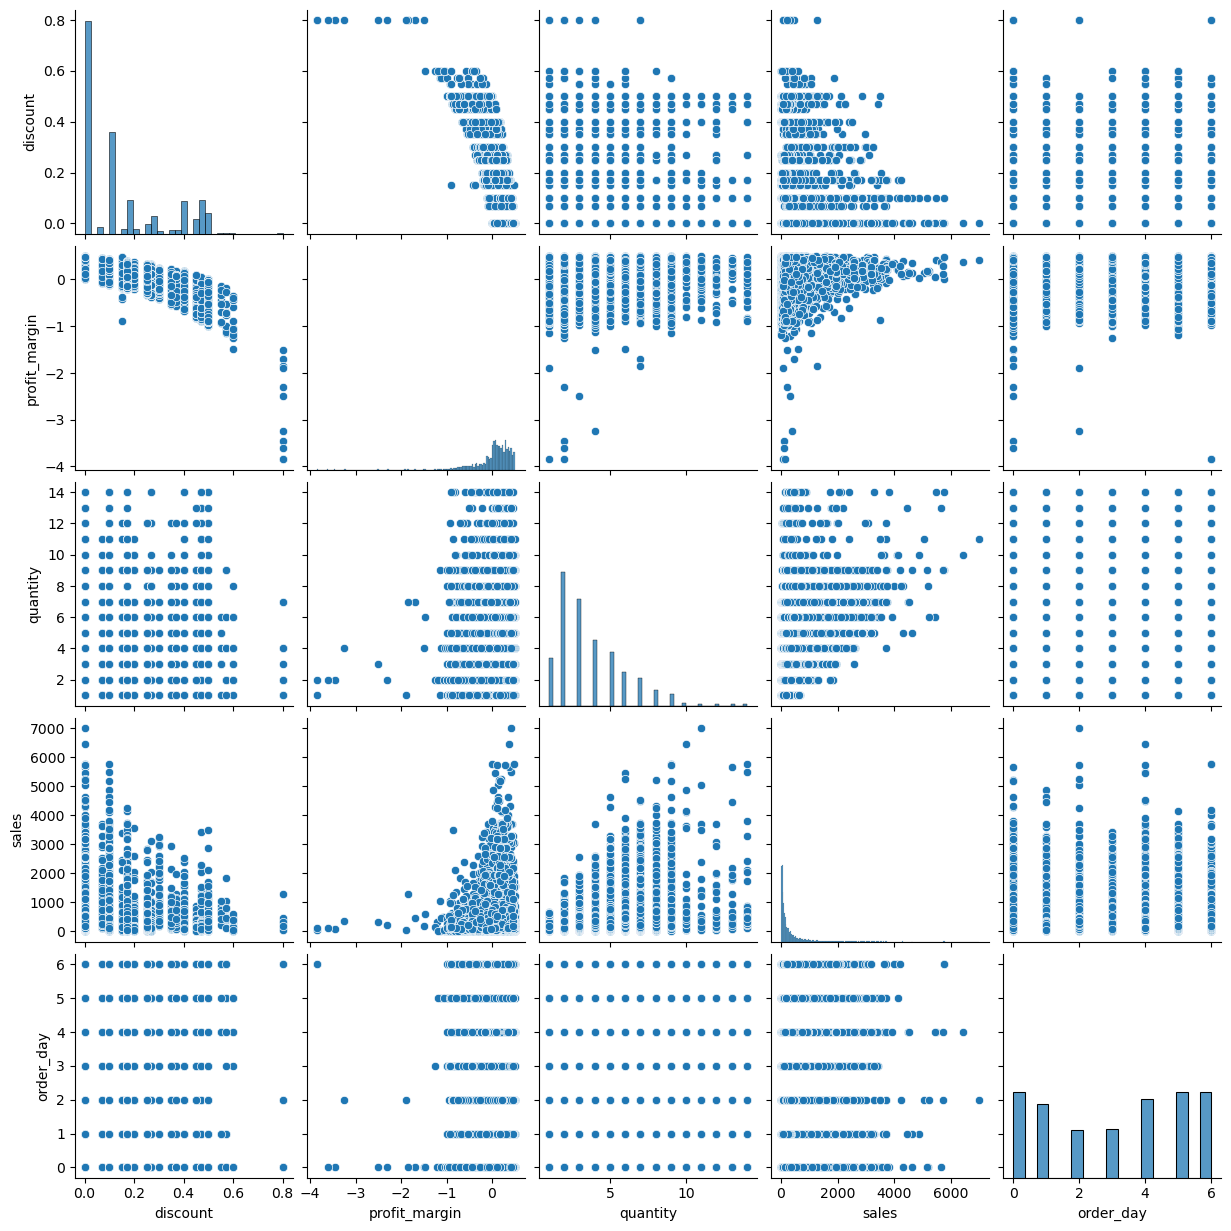

In [11]:
sns.pairplot(plot_data)

## Displaying Categorical Data

Scatterplots are useful for visualizing the relationship between numerical data. However when plotting categorical values the points may overlap too much. 

### Stripplot
A stripplot adds 'jitter' to the points.

<Axes: xlabel='order_day', ylabel='sales'>

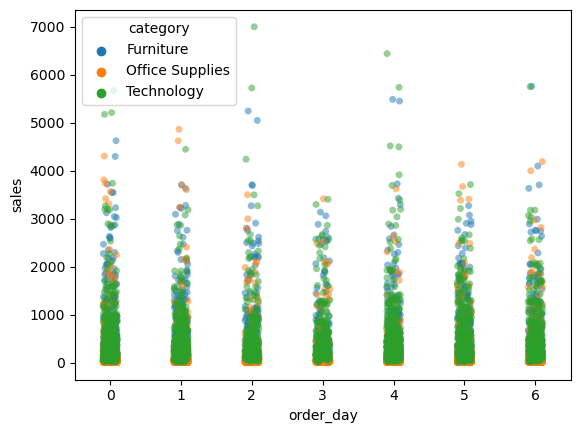

In [12]:
sns.stripplot(x='order_day', y='sales', data=orders, hue='category', alpha=0.5)

### Violinplot

A violinplot shows the frequency distribution as well as the boxplot of the numeric variables

<Axes: xlabel='category', ylabel='sales'>

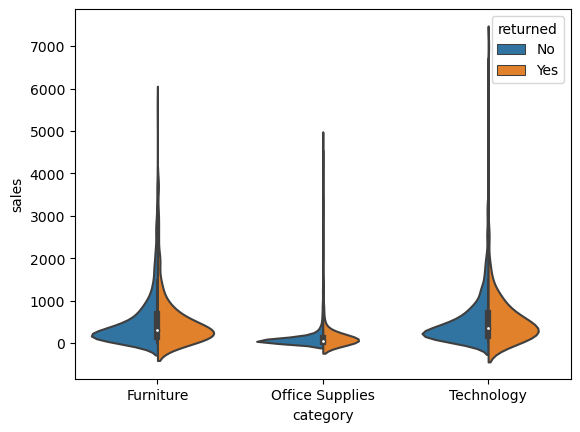

In [13]:
sns.violinplot(x='category', y='sales', data=orders, alpha=0.5, hue='returned', split=True)

## Faceting with Seaborn

We can create subplots, called **Facets**, with Seaborn to compare categories.

Each facet is used to represent one category, and can be defined by row, column, or both.


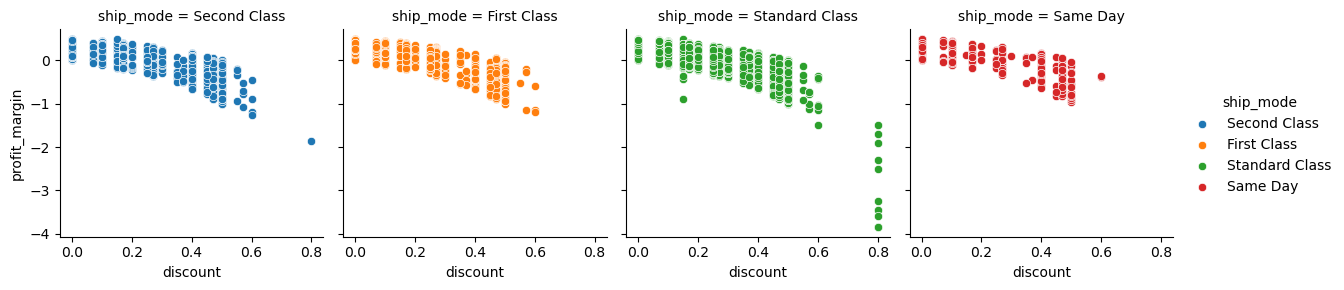

In [14]:
# For example, creating a FacetGrid object where each column represents one ship mode
ax = sns.FacetGrid(orders, col='ship_mode', hue='ship_mode')

# Now map the plotting function onto the facets
ax.map(sns.scatterplot, 'discount', 'profit_margin')
ax.add_legend()
plt.show()

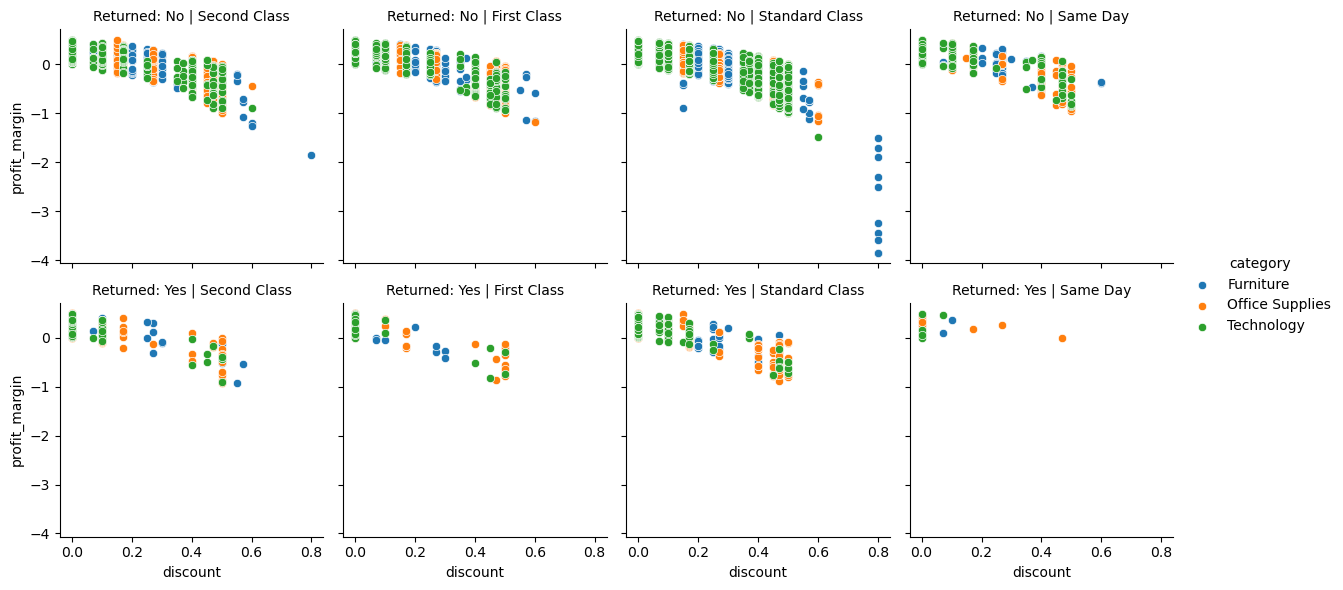

In [15]:
# For example, Add another facet by row to show return status
ax = sns.FacetGrid(orders, col='ship_mode', row='returned', hue='category')
ax.map(sns.scatterplot, 'discount', 'profit_margin')
ax.set_titles(col_template="{col_name}", row_template="Returned: {row_name}")
ax.add_legend()
plt.show()

### Bar Chart 
A bar chart is another type of plot that is usually used to compare categorical data. Seaborn can automatically create a barplot with an estimated summary value by category.

For example, we can create a barplot comparing the mean `sales` based on product `category`.

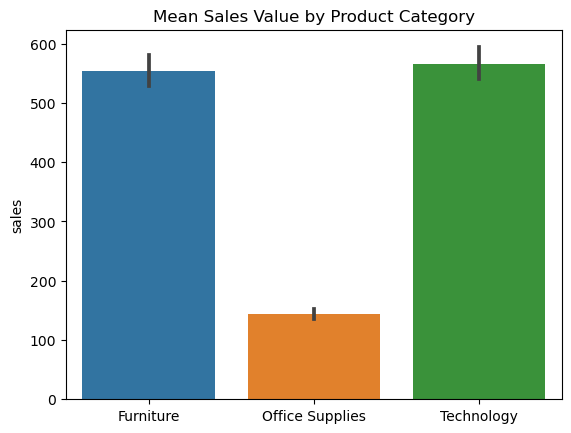

In [16]:
# bar plot of mean sales by order return status
ax = sns.barplot(data = orders, x = 'category', y='sales')
ax.set_title("Mean Sales Value by Product Category")
ax.set_xlabel('')
plt.show()

The little black lines shown at the top of each bar is an error bar to show the confidence interval estimate for the mean. We can turn it off by using the argument `ci=None`.

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13580\2709845678.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


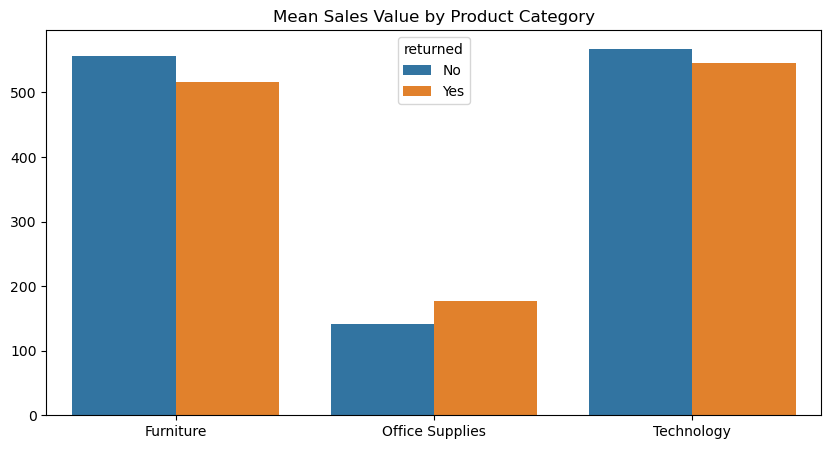

In [17]:
# bar plot of mean sales by order return status
fig, ax = plt.subplots(figsize=(10,5))
# use hue for the category and palette for the required colors
ax = sns.barplot(
    data = orders, 
    x = 'category', 
    y='sales', 
    hue='returned', 
    ci=None, 
    dodge=True)
ax.set_title("Mean Sales Value by Product Category")
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

### Specifying Colors
We can specify basic colors in matplotlib by name (or letter). 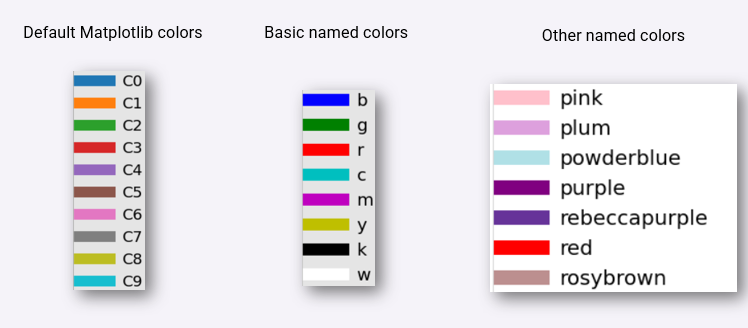


In Seaborn, the colors can be specified using the `palette=` kwarg. You can also use colormaps to represent quantitative data.
You can check the colormap names [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) 

**Estimator Values**

When we specify the categories that we want to plot, Seaborn will calculate an single value from each group of categories depending on the `estimator=` argument. 

The default estimator is the mean, but we can specify a different estimator such as
- `estimator=len` for the number of observations in the group
- `estimator=np.median` for the median value (using numpy)
- `estimator=sum` for the sum of all the values
- `estimator=max` for the highest value
- `estimator=min` for the lowest value



C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13580\418721573.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data = orders,


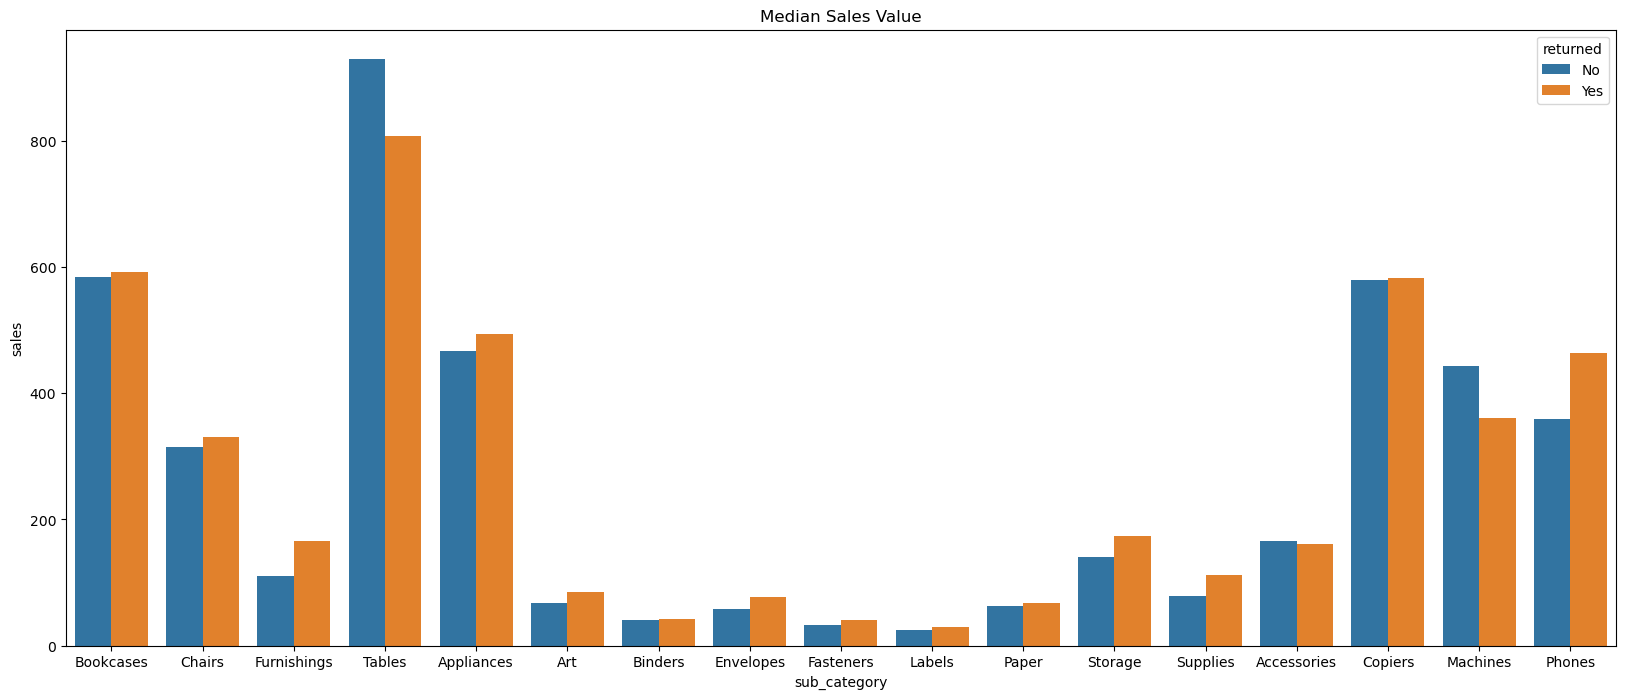

In [18]:
# bar plot of Median sales value by return status
import numpy as np
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.barplot(data = orders, 
                 x = 'sub_category', 
                 y='sales', 
                 hue='returned', 
                 ci=None, 
                 estimator=np.median)
ax.set_title("Median Sales Value")
plt.show()

### Heatmaps with Seaborn

When a category has many levels, like the `sub_category` above, a heatmap is useful for comparing the values by color. 

A heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. 
The goal of the heatmap is to provide a colored visual summary of information. 

For example, we can calculate the mean sales for each order by return status. First we create a two-way table for the two dimensions, `sub_category` and `returned`.

In [19]:
# Calculate mean sales for each group of sub category and day name
sales_by_subcategory= orders.groupby(['sub_category','order_day_name'])['sales'].mean()
data = sales_by_subcategory.unstack()
data

order_day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
sub_category,,,,,,,
Accessories,278.744157,274.276492,239.407474,268.994839,246.027661,254.431237,327.626405
Appliances,782.138040,966.504842,938.040031,910.496620,885.313588,998.153840,838.260255
Art,89.998679,101.648771,97.529971,86.882866,102.013845,95.832816,88.033190
Binders,68.004107,62.770647,66.542154,70.461396,64.211498,65.874900,60.381153
Bookcases,722.560088,897.584288,786.634558,712.852451,819.599320,821.740913,975.017705
Chairs,542.089435,552.034822,483.776523,523.958793,449.198060,530.435970,614.110642
Copiers,754.381364,711.503718,767.398126,815.210500,749.483495,764.747047,736.665238
Envelopes,77.660620,83.003514,78.247523,92.449670,88.779887,80.855718,91.288931
Fasteners,42.380016,43.495153,42.242284,45.760269,39.389922,37.367128,44.907030


#### Reordering the Axis Labels

We can put the weekday names in order so that it's easier to identify if there are any trends. To do this, we can specify the `xticklabels` in the required order.

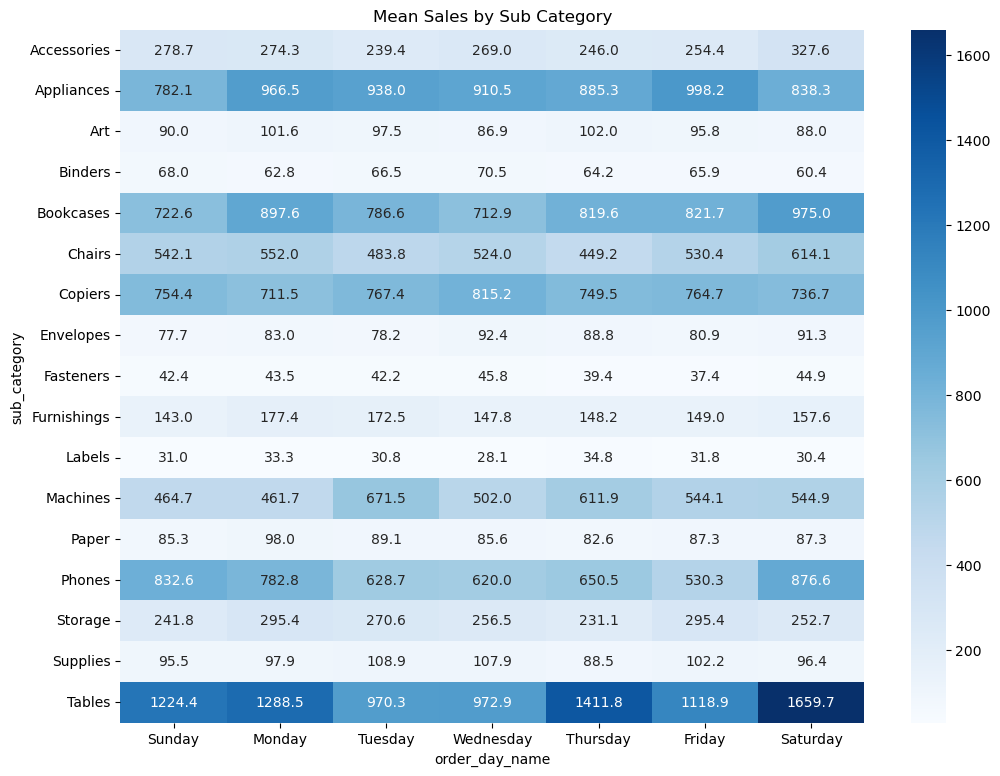

In [20]:
# Create heatmap
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.heatmap(data, 
               annot=True, 
               fmt="0.1f", 
               cmap="Blues",
               xticklabels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
ax.set_title('Mean Sales by Sub Category')
plt.show()

### Showing Correlation

A correlation matrix can be used to investigate the correlation between numeric values in a DataFrame.

The Pandas `corr` method can generate the correlation matrix on the numeric variables.

Two variables can have
- Strong positive correlation: pearson correlation statistic close to 1 
- Strong negative correlation: pearson correlation statistic close to -1 
- Weak correlation: pearson correlation statistic close to 0

A value of 1 shows perfect correlation and this can be seen when a variable is compared against itself. 

In [21]:
# Correlation matrix

corr_mat = data.corr()
corr_mat

order_day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
order_day_name,,,,,,,
Friday,1.000000,0.988076,0.956000,0.971436,0.978700,0.959990,0.985065
Monday,0.988076,1.000000,0.967525,0.976830,0.983506,0.980979,0.982551
Saturday,0.956000,0.967525,1.000000,0.989760,0.965205,0.987313,0.929746
Sunday,0.971436,0.976830,0.989760,1.000000,0.965364,0.990186,0.939373
Thursday,0.978700,0.983506,0.965205,0.965364,1.000000,0.977314,0.984737
Tuesday,0.959990,0.980979,0.987313,0.990186,0.977314,1.000000,0.947715
Wednesday,0.985065,0.982551,0.929746,0.939373,0.984737,0.947715,1.000000


### Heatmap for Correlation

A heatmap can be used to show the correlation visually where darker colors can be used to indicate stronger correlations.


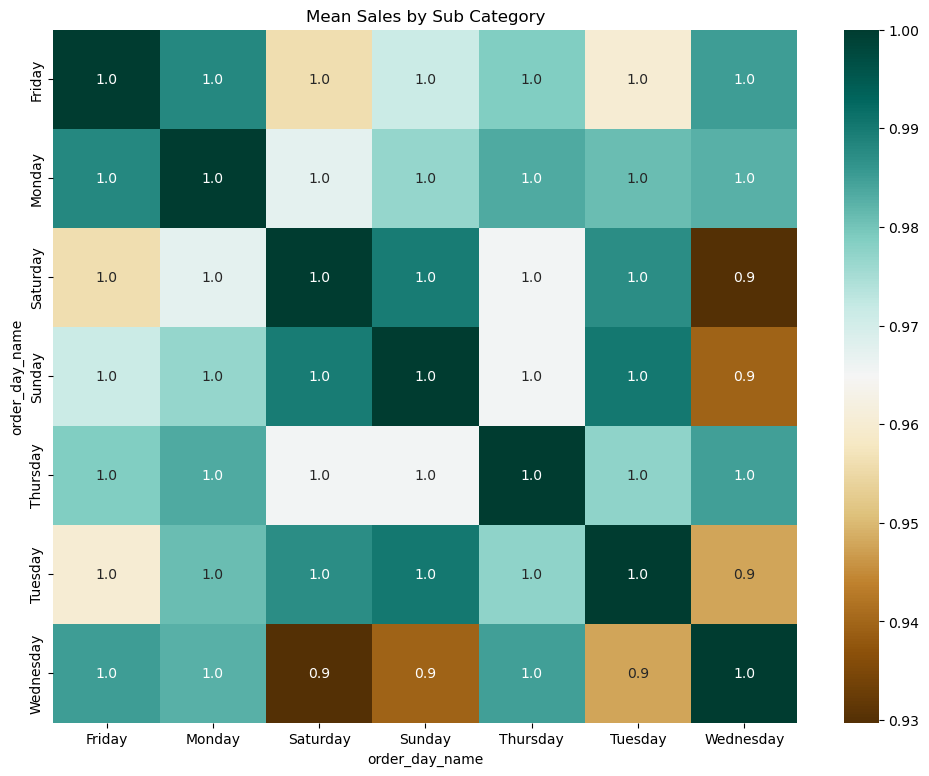

In [22]:

# Create heatmap
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.heatmap(corr_mat, 
               annot=True, 
               fmt="0.01f", 
               cmap="BrBG")
ax.set_title('Mean Sales by Sub Category')
plt.show()


### Summary

Phew! That is quite a lot of plotting, but in summary:

[Seaborn](https://seaborn.pydata.org/tutorial.html) is integrated with matplotlib but provides an easier interface for grouping categorical variables.

There are so many other types of plots that you can create in both Seaborn, so do check out the documentation and explore the other types of visualizations.


### Review and Homework

For this homework, we will use the diamonds dataset to create the plots using Seaborn.


In [23]:
# Make sure you have the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the diamonds data set
diamonds = pd.read_csv('datasets/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Q1. Create a scatter plot using
- data: diamonds
- x-axis: depth
- y-axis: table
- color of markers: cut
- size of markers: price
- transparency: 0.5



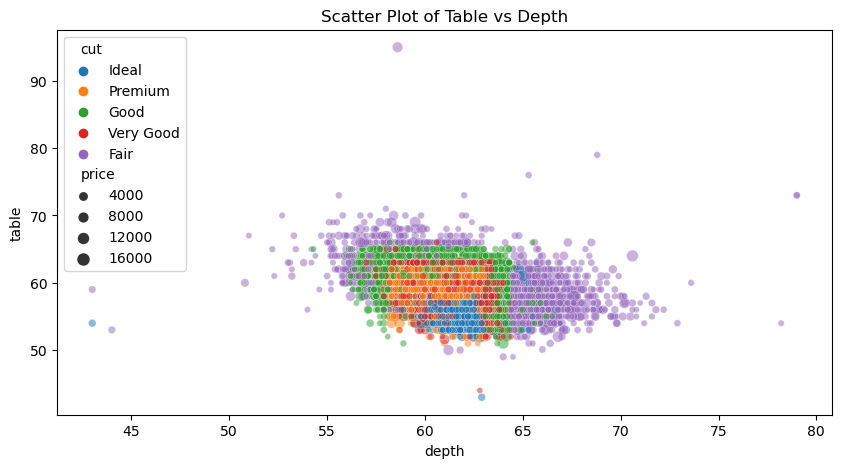

In [24]:
#Q1 Answer Using Seaborn
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data =diamonds, 
                     x='depth', y='table', 
                     hue='cut', size='price', alpha = 0.5)
plt.title("Scatter Plot of Table vs Depth")
plt.show()

Q2. Use facets to separate the plots by cut.


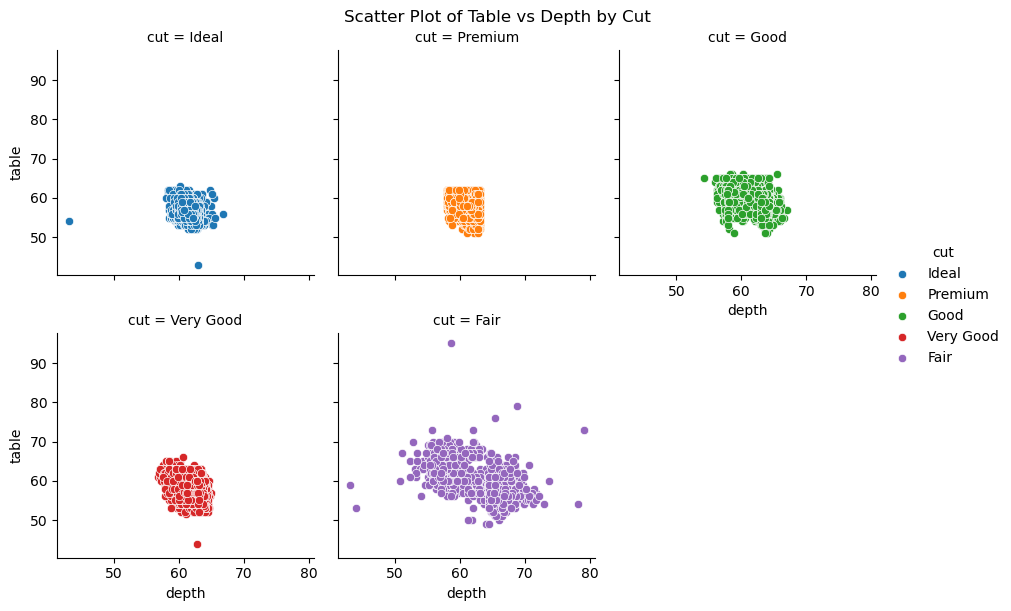

In [38]:
#Q2 Using Seaborn

# For example, creating a FacetGrid object where each column represents one cut
ax = sns.FacetGrid(diamonds, col='cut', hue='cut', col_wrap=3)

# Now map the plotting function onto the facets
ax.map(sns.scatterplot, 'depth', 'table')
ax.add_legend()
plt.suptitle('Scatter Plot of Table vs Depth by Cut', y=1.01)
plt.show()

Q3. Draw Bar Charts to compare the mean prices by Cut and Clarity


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13580\2927239216.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data = diamonds, x = 'cut', y='price', hue='clarity',ci=None, palette='BuPu')


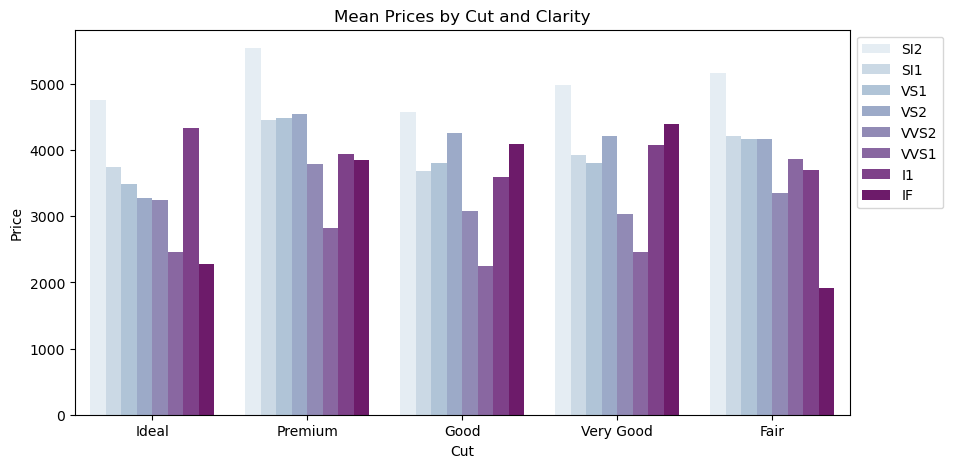

In [42]:
#Q3 Using Seaborn
fig = plt.figure(figsize = (10,5))
ax = sns.barplot(data = diamonds, x = 'cut', y='price', hue='clarity',ci=None, palette='BuPu')
ax.set_title("Mean Prices by Cut and Clarity")
ax.set_xlabel('Cut')
ax.set_ylabel('Price')
ax.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

Q4. Generate the correlation matrix to check the correlation between the numeric variables in the diamonds dataset.

In [27]:
# Q4 answer 
# Correlation matrix
corr_mat = diamonds.corr(numeric_only=True)
corr_mat

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Q5. Use the correlation matrix in a heatmap to determine the variables which are most highly correlated

<function matplotlib.pyplot.show(close=None, block=None)>

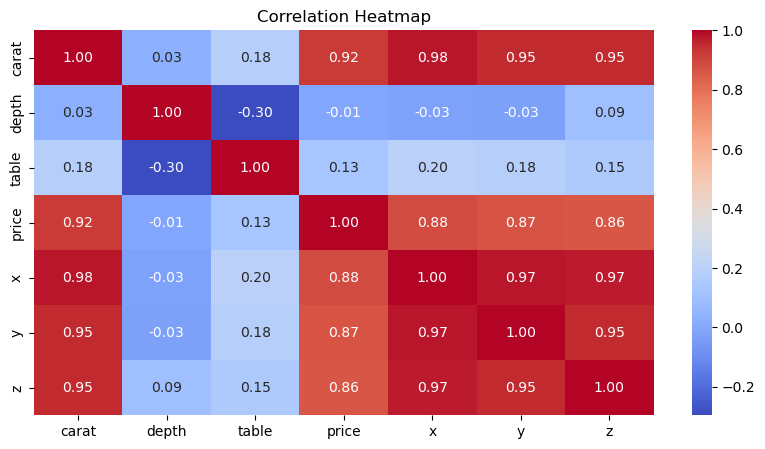

In [47]:
#Q5 Answer using seaborn
fig = plt.figure(figsize = (10,5))
ax = sns.heatmap(corr_mat, annot=True, fmt='0.2f', cmap='coolwarm')
ax.set_title('Correlation Heatmap')
plt.show

Go ahead and try the other plots available in Seaborn to explore the data!

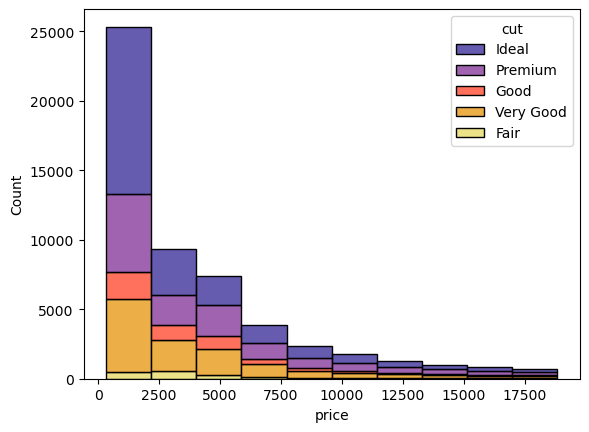

In [55]:
# histogram
ax = sns.histplot(diamonds, x='price', bins=10, hue='cut', palette = 'CMRmap', multiple='stack')